In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('music_dataset_mod.csv')


In [7]:
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [4]:
df.Genre.unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

<Axes: xlabel='Genre', ylabel='count'>

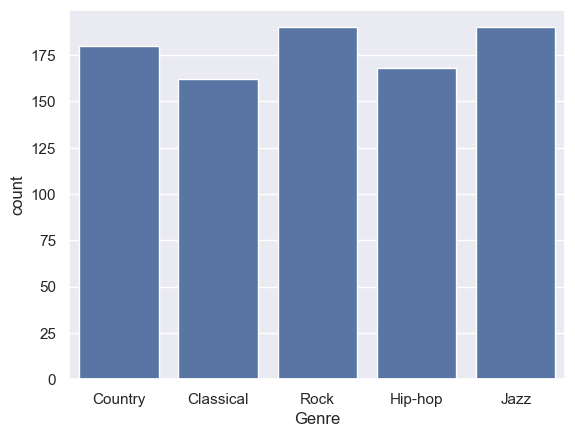

In [6]:
sns.countplot(df, x="Genre")

In [8]:
df_copy = df.copy()

In [11]:
df_copy = df_copy.dropna()

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), object(1)

In [16]:
X = df_copy.drop('Genre', axis=1)
y = df_copy['Genre']

In [17]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [60]:
# Afficher les classes et leur encodage
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Afficher les classes originales avec leur étiquette numérique
for genre, encoding in class_mapping.items():
    print(f"Classe: {genre}, Code: {encoding}")

Classe: Classical, Code: 0
Classe: Country, Code: 1
Classe: Hip-hop, Code: 2
Classe: Jazz, Code: 3
Classe: Rock, Code: 4


In [30]:
print(type(X))
print(type(y_encoded))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [31]:
# Convert y_encoded to a DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns=['Genre'])

# Concatenate DataFrame and the new column horizontally
df_updated = pd.concat([X, y_encoded_df], axis=1)

print(df_updated.head())

        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908       

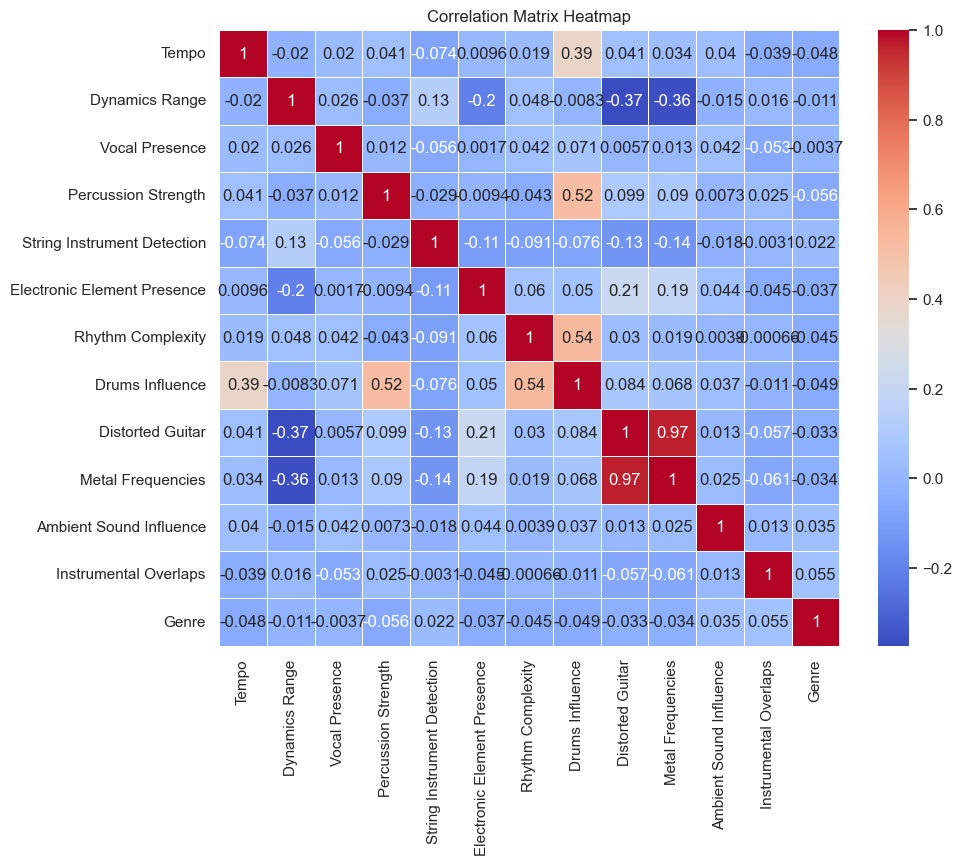

In [32]:
# Generate the correlation matrix
correlation_matrix = df_updated.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Apply PCA
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 1.0572597 ,  0.28161626,  0.62342202, ...,  0.74994362,
        -0.41133069,  0.20089952],
       [-1.86454175,  2.72389526, -0.06110915, ..., -0.46808373,
        -0.06524083,  0.03262838],
       [ 1.86197335,  0.0390771 ,  0.30639382, ...,  1.12924615,
        -0.20497339, -0.13108671],
       ...,
       [ 0.41959195, -2.19097097,  1.57481878, ...,  0.61746001,
         0.86535466, -0.11015801],
       [ 0.59721268, -2.33887467, -0.91433944, ..., -0.92203511,
        -0.11584256,  0.27384145],
       [-0.33474784, -0.75956161,  0.16804437, ..., -0.96472679,
        -0.77845888, -0.16213001]])

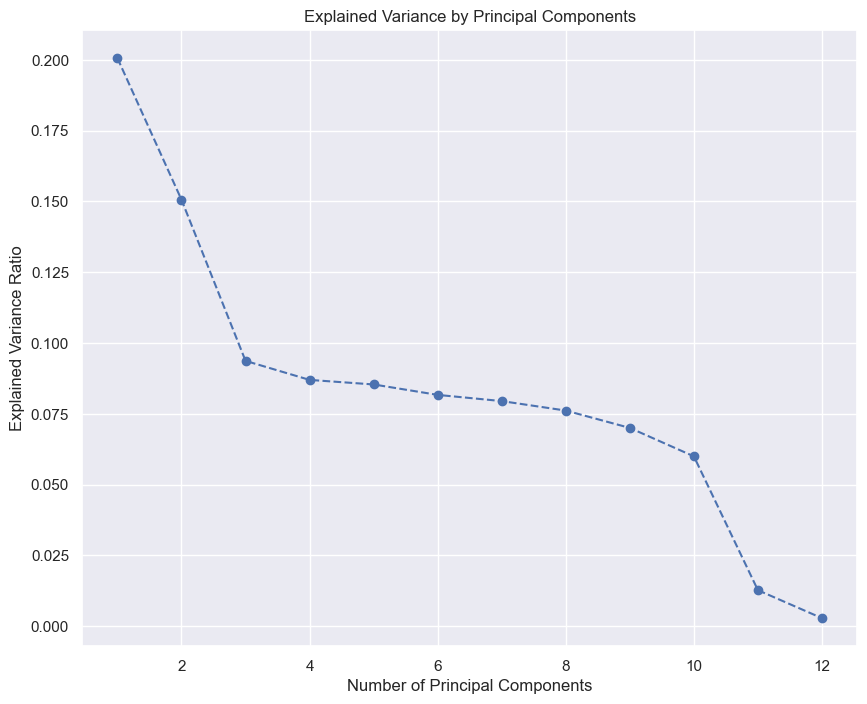

In [39]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [40]:

# Optionally, create a DataFrame to observe the explained variance ratio
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

print(explained_variance_df)

    Principal Component  Explained Variance Ratio
0                     1                  0.200631
1                     2                  0.150628
2                     3                  0.093692
3                     4                  0.086969
4                     5                  0.085361
5                     6                  0.081674
6                     7                  0.079483
7                     8                  0.076135
8                     9                  0.070002
9                    10                  0.059962
10                   11                  0.012673
11                   12                  0.002791


We aim to keep enough components to account for at least 80% of the total variance.

The cumulative explained variance is as follows:

1st component: 20.06%

2nd component: 15.06%

3rd component: 9.37%

4th component: 8.70%

5th component: 8.54%

6th component: 8.17%

7th component: 7.95%

8th component: 7.61%

9th component: 7.00%

10th component: 6.00%

Summing the explained variances until we reach at least 80%: 
20.06 + 15.06 + 9.37 + 8.70 + 8.54 + 8.17 + 7.95 + 7.61  = 85.46%



We reach above 80% with the first 8 components. Therefore, we will reapply PCA with 

n_components=8.

In [41]:
# Initialize PCA with 8 components
pca_final = PCA(n_components=8)

# Fit and transform the data
X_pca_final = pca_final.fit_transform(X_scaled)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y_encoded, test_size=0.3, random_state=42)

In [43]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=10000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [44]:
# Predict the test set results for PCA data
y_pred_pca = log_reg.predict(X_test)

# Calculate accuracy for PCA data
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Generate classification report for PCA data
report_pca = classification_report(y_test, y_pred_pca)

print(f"Accuracy for PCA data: {accuracy_pca}")
print("Classification Report for PCA data:\n", report_pca)

Accuracy for PCA data: 0.5355805243445693
Classification Report for PCA data:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [45]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [46]:
# Initialize and train the logistic regression model on original data
log_reg_orig = LogisticRegression(max_iter=10000)
log_reg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [47]:
# Predict the test set results for original data
y_pred_orig = log_reg_orig.predict(X_test_orig)

# Calculate accuracy for original data
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)

# Generate classification report for original data
report_orig = classification_report(y_test_orig, y_pred_orig)

print(f"Accuracy for original data: {accuracy_orig}")
print("Classification Report for original data:\n", report_orig)


Accuracy for original data: 0.5318352059925093
Classification Report for original data:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [48]:
# Print comparison of accuracy and classification reports
print(f"Accuracy for PCA-transformed data: {accuracy_pca}")
print("Classification Report for PCA-transformed data:\n", report_pca)
print("\n")
print(f"Accuracy for original data: {accuracy_orig}")
print("Classification Report for original data:\n", report_orig)


Accuracy for PCA-transformed data: 0.5355805243445693
Classification Report for PCA-transformed data:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



Accuracy for original data: 0.5318352059925093
Classification Report for original data:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54   

In [49]:
# Extract rows where the 'Genre' column is missing
unknown_genre_data = df[df['Genre'].isna()]

In [50]:
# Remove the 'Genre' column from the unknown_genre_data
X_unknown = unknown_genre_data.drop(columns=['Genre'])

In [51]:
# Fit the scaler on the training data and transform the unknown data
X_unknown_scaled = scaler.fit_transform(X_unknown)

In [54]:
# Assuming pca is the PCA model that was fitted during training
X_unknown_pca = pca_final.transform(X_unknown_scaled)

In [55]:
# Make predictions using the trained Logistic Regression model
predictions = log_reg.predict(X_unknown_pca)  # Use X_unknown_scaled if PCA is not applied


In [56]:
# Add the predictions to the original DataFrame
unknown_genre_data['Predicted_Genre'] = predictions
unknown_genre_data

C:\Users\HP\AppData\Local\Temp\ipykernel_1452\322638473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_genre_data['Predicted_Genre'] = predictions


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Predicted_Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN,0
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN,1
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN,1
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN,2
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN,2
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN,4
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN,2
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN,2


In [57]:
# Step 1: Apply inverse_transform on the predictions
original_predictions = encoder.inverse_transform(predictions)

# Step 2: Add the transformed predictions to the DataFrame
unknown_genre_data['Predicted_Genre'] = original_predictions
unknown_genre_data

C:\Users\HP\AppData\Local\Temp\ipykernel_1452\3359053692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_genre_data['Predicted_Genre'] = original_predictions


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Predicted_Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN,Hip-hop
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN,Hip-hop


In [58]:
# Step 1: Update the original DataFrame with predicted genres
df.loc[df['Genre'].isnull(), 'Genre'] = unknown_genre_data['Predicted_Genre']

# Step 2: Review the updated DataFrame
print(df[df['Genre'].isnull()])  # This should show no rows if all missing values are filled
print(df.head())  # Optionally, check the first few rows to inspect the update


Empty DataFrame
Columns: [Tempo, Dynamics Range, Vocal Presence, Percussion Strength, String Instrument Detection, Electronic Element Presence, Rhythm Complexity, Drums Influence, Distorted Guitar, Metal Frequencies, Ambient Sound Influence, Instrumental Overlaps, Genre]
Index: []
        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584               

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        1000 non-null   object 
dtypes: float64(12), obj

In [61]:
print(df['Genre'][992:])

992         Rock
993      Hip-hop
994      Hip-hop
995    Classical
996    Classical
997         Rock
998         Rock
999         Jazz
Name: Genre, dtype: object
